# Data Loading and Cleaning

In [1]:
# Authors - Hrishikesh Umesh Bhatt, Prashast Vaish

In [2]:
# Importing the relevant packages, creating the DataFrame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Changing base directory
os.chdir(r'C:\Users\Prashast\OneDrive\Desktop\Purdue\Course\MOD 1\MGMT 58600 - Python\Project')

# Loading csv data into a pandas dataframe
data = pd.read_csv('NYC-BikeShare-2015-2017-combined.csv')
df = pd.DataFrame(data)

In [3]:
# Inspecting the pandas dataframe
df.sample(10)

Unnamed: 0  Trip Duration           Start Time            Stop Time  \
715504        4404            367  2017-03-08 20:17:54  2017-03-08 20:24:01   
470082         137            283  2016-05-01 18:04:41  2016-05-01 18:09:25   
21994         2730            469  2015-10-06 14:58:10  2015-10-06 15:05:59   
172226       22413            187  2016-06-29 09:02:30  2016-06-29 09:05:38   
377876        6396            521  2015-09-30 17:10:54  2015-09-30 17:19:35   
107452        6980           1759  2016-03-17 11:06:28  2016-03-17 11:35:48   
167656       17843            179  2016-06-23 18:40:32  2016-06-23 18:43:31   
92519          297            407  2016-02-01 19:26:38  2016-02-01 19:33:25   
618854       13464            369  2016-10-14 08:39:49  2016-10-14 08:45:59   
673743        1796            521  2017-01-05 18:29:59  2017-01-05 18:38:41   

        Start Station ID Start Station Name  Start Station Latitude  \
715504              3186      Grove St PATH               40.719586   
470082              3187          Warren St               40.721124   
21994               3203      Hamilton Park               40.727596   
172226              3213     Van Vorst Park               40.718489   
377876              3183     Exchange Place               40.716247   
107452              3203      Hamilton Park               40.727596   
167656              3183     Exchange Place               40.716247   
92519               3211         Newark Ave               40.721525   
618854              3206            Hilltop               40.731169   
673743              3195            Sip Ave               40.730743   

        Start Station Longitude  End Station ID       End Station Name  \
715504               -74.043117            3209           Brunswick St   
470082               -74.038051            3185              City Hall   
21994                -74.044247            3185              City Hall   
172226               -74.047727            3186          Grove St PATH   
377876               -74.033459            3211             Newark Ave   
107452               -74.044247            3203          Hamilton Park   
167656               -74.033459            3214       Essex Light Rail   
92519                -74.046305            3211             Newark Ave   
618854               -74.057574            3225  Baldwin at Montgomery   
673743               -74.063784            3281    Leonard Gordon Park   

        End Station Latitude  End Station Longitude  Bike ID   User Type  \
715504             40.724176             -74.050656    26227  Subscriber   
470082             40.717732             -74.043845    24600  Subscriber   
21994              40.717732             -74.043845    24652  Subscriber   
172226             40.719586             -74.043117    24377  Subscriber   
377876             40.721525             -74.046305    24441  Subscriber   
107452             40.727596             -74.044247    24640  Subscriber   
167656             40.712774             -74.036486    24640  Subscriber   
92519              40.721525             -74.046305    24543  Subscriber   
618854             40.723659             -74.064194    24519  Subscriber   
673743             40.745910             -74.057271    24463  Subscriber   

        Birth Year  Gender  Trip_Duration_in_min  
715504      1978.0       2                     6  
470082      1965.0       1                     5  
21994       1962.0       2                     8  
172226      1962.0       1                     3  
377876      1984.0       1                     9  
107452      1980.0       1                    29  
167656      1984.0       1                     3  
92519       1987.0       2                     7  
618854      1988.0       2                     6  
673743      1972.0       1                     9

In [4]:
# Getting details on the null values and the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               735502 non-null  int64  
 1   Trip Duration            735502 non-null  int64  
 2   Start Time               735502 non-null  object 
 3   Stop Time                735502 non-null  object 
 4   Start Station ID         735502 non-null  int64  
 5   Start Station Name       735502 non-null  object 
 6   Start Station Latitude   735502 non-null  float64
 7   Start Station Longitude  735502 non-null  float64
 8   End Station ID           735502 non-null  int64  
 9   End Station Name         735502 non-null  object 
 10  End Station Latitude     735502 non-null  float64
 11  End Station Longitude    735502 non-null  float64
 12  Bike ID                  735502 non-null  int64  
 13  User Type                735502 non-null  object 
 14  Birt

In [5]:
# finding the number of duplicate values in the data
df.duplicated().sum()

395882

##### there are 395882 duplicate rows in our data

In [6]:
# dropping duplicate values
df.drop_duplicates(inplace = True)

In [7]:
# Counting null values in the data
df.isna().sum() 

Unnamed: 0                 0
Trip Duration              0
Start Time                 0
Stop Time                  0
Start Station ID           0
Start Station Name         0
Start Station Latitude     0
Start Station Longitude    0
End Station ID             0
End Station Name           0
End Station Latitude       0
End Station Longitude      0
Bike ID                    0
User Type                  0
Birth Year                 0
Gender                     0
Trip_Duration_in_min       0
dtype: int64

##### There are no null values in the data

##### Checking the type of Start and Stop times, so that we can perform relevant operations on them later:

In [8]:
# replacing column name to clarify that trip duration is in seconds
df.rename(columns={'Trip Duration': 'Trip_duration_secs'}, inplace = True) 

# checking that the format of start time is appropriate
print(df['Start Time'].dtype) 

# checking that the format of stop time is appropriate
print(df['Start Time'].dtype)

object
object


In [9]:
# converting to appropriate datetime format
try:
    pd.to_datetime(df['Start Time'], format='%m/%d/%y %H:%M')
except:
    print("Already in datetime format !")

Already in datetime format !


In [10]:
# extracting year from start time to find age of riders
df['year'] = pd.DatetimeIndex(df['Start Time']).year 

In [11]:
# Calculating ages of riders from the derived year and Birth Year fields. This is approximate since we don't have exact birth dates for riders
df['Age'] = df['year'] - df['Birth Year']

In [12]:
# Dropping the column as it is redundant in the data
df.drop('Unnamed: 0', axis = 1, inplace = True)

# Exploratory Data Analysis

### Categorical variables - Bike ID, Station ID, Station Name, User Type (Subscriber or Customer), Gender
### Continuous variables - Trip_duration_secs, Trip_Duration_in_min, Birth Year (Age), Start Time and Stop Time

##### Inspecting our numerical variables:

In [13]:
# Getting statistics on the dataframe
df.describe()

Trip_duration_secs  Start Station ID  Start Station Latitude  \
count        3.396200e+05     339620.000000           339620.000000   
mean         9.629629e+02       3206.818214               40.723126   
std          4.868570e+04         26.610566                0.008139   
min          6.100000e+01       3183.000000               40.692640   
25%          2.470000e+02       3186.000000               40.717732   
50%          3.840000e+02       3202.000000               40.721525   
75%          6.560000e+02       3211.000000               40.727596   
max          2.026021e+07       3426.000000               40.752559   

       Start Station Longitude  End Station ID  End Station Latitude  \
count            339620.000000   339620.000000         339620.000000   
mean                -74.046422     3203.450032             40.722469   
std                   0.011194       62.608460              0.070325   
min                 -74.096937      147.000000              0.000000   
25%                 -74.050656     3186.000000             40.716540   
50%                 -74.044247     3199.000000             40.721124   
75%                 -74.038051     3211.000000             40.727224   
max                 -74.032108     3442.000000             40.801343   

       End Station Longitude        Bike ID     Birth Year         Gender  \
count          339620.000000  339620.000000  339620.000000  339620.000000   
mean              -74.045612   24911.866754    1979.559938       1.122720   
std                 0.127556     743.745408       9.360072       0.519344   
min               -74.096937   14552.000000    1900.000000       0.000000   
25%               -74.050444   24486.000000    1975.000000       1.000000   
50%               -74.043845   24602.000000    1982.000000       1.000000   
75%               -74.036486   24711.000000    1986.000000       1.000000   
max                 0.000000   29296.000000    2000.000000       2.000000   

       Trip_Duration_in_min           year            Age  
count         339620.000000  339620.000000  339620.000000  
mean              16.048107    2015.959572      36.399635  
std              811.427736       0.519002       9.368827  
min                1.000000    2015.000000      16.000000  
25%                4.000000    2016.000000      30.000000  
50%                6.000000    2016.000000      34.000000  
75%               11.000000    2016.000000      41.000000  
max           337670.000000    2017.000000     116.000000

### Univariate Analysis

##### 1. Trip Duration:

##### The max trip duration seems quite high. Visualising the distribution using a boxplot and trying to find outliers.

<Axes: xlabel='Trip_Duration_in_min'>

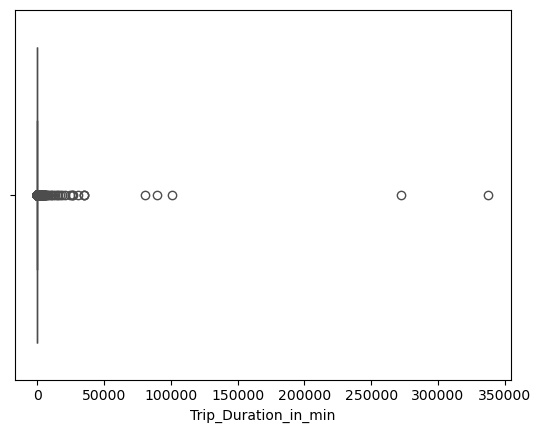

In [14]:
# Visualizing the distribution of trip duration in minutes using a box plot
sns.set_palette('bright')
sns.boxplot(data = df, x = 'Trip_Duration_in_min')

##### Since there are many outliers from the boxplot, we should gauge how many there are and deal with them accordingly.
##### Using the 1.5*IQR method to find outliers:

In [15]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Trip_Duration_in_min'].quantile(0.25)
Q3 = df['Trip_Duration_in_min'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Count outliers
outliers = df[(df['Trip_Duration_in_min'] < lower_bound) | (df['Trip_Duration_in_min'] > upper_bound)]
outlier_count = outliers.shape[0]  # Count of outliers

# Inspecting the outliers dataframe
outliers

Trip_duration_secs           Start Time            Stop Time  \
2                     2714  2015-10-01 00:32:46  2015-10-01 01:18:01   
7                     1299  2015-10-01 01:10:10  2015-10-01 01:31:50   
22                   18715  2015-10-01 06:58:40  2015-10-01 12:10:36   
53                    2640  2015-10-01 07:40:25  2015-10-01 08:24:26   
85                    1596  2015-10-01 08:08:55  2015-10-01 08:35:31   
...                    ...                  ...                  ...   
378107                1941  2015-09-30 21:09:45  2015-09-30 21:42:06   
378112                1481  2015-09-30 21:20:10  2015-09-30 21:44:52   
378122                1812  2015-09-30 21:56:44  2015-09-30 22:26:56   
378138                7992  2015-09-30 22:57:53  2015-10-01 01:11:06   
378147                2415  2015-09-30 23:51:46  2015-10-01 00:32:01   

        Start Station ID Start Station Name  Start Station Latitude  \
2                   3193       Lincoln Park               40.724605   
7                   3197           North St               40.752559   
22                  3185          City Hall               40.717732   
53                  3205  JC Medical Center               40.716540   
85                  3216      Columbia Park               40.697030   
...                  ...                ...                     ...   
378107              3211         Newark Ave               40.721525   
378112              3185          City Hall               40.717732   
378122              3183     Exchange Place               40.716247   
378138              3187          Warren St               40.721124   
378147              3199       Newport Pkwy               40.728745   

        Start Station Longitude  End Station ID End Station Name  \
2                    -74.078406            3193     Lincoln Park   
7                    -74.044725            3215      Central Ave   
22                   -74.043845            3184      Paulus Hook   
53                   -74.049638            3213   Van Vorst Park   
85                   -74.096937            3195          Sip Ave   
...                         ...             ...              ...   
378107               -74.046305            3199     Newport Pkwy   
378112               -74.043845            3202     Newport PATH   
378122               -74.033459            3183   Exchange Place   
378138               -74.038051            3187        Warren St   
378147               -74.032108            3199     Newport Pkwy   

        End Station Latitude  End Station Longitude  Bike ID   User Type  \
2                  40.724605             -74.078406    24628  Subscriber   
7                  40.746730             -74.049251    24550    Customer   
22                 40.714145             -74.033552    24516  Subscriber   
53                 40.718489             -74.047727    24495  Subscriber   
85                 40.730743             -74.063784    24587  Subscriber   
...                      ...                    ...      ...         ...   
378107             40.728745             -74.032108    24662  Subscriber   
378112             40.727224             -74.033759    24476  Subscriber   
378122             40.716247             -74.033459    24421  Subscriber   
378138             40.721124             -74.038051    24714    Customer   
378147             40.728745             -74.032108    24613  Subscriber   

        Birth Year  Gender  Trip_Duration_in_min  year   Age  
2           1983.0       1                    45  2015  32.0  
7           1984.0       0                    22  2015  31.0  
22          1980.0       1                   312  2015  35.0  
53          1984.0       1                    44  2015  31.0  
85          1963.0       1                    27  2015  52.0  
...            ...     ...                   ...   ...   ...  
378107      1985.0       1                    32  2015  30.0  
378112      1988.0       2                    25  2015  

In [16]:
# We have lots of outliers. Let's study its statistics:
outliers.describe()

Trip_duration_secs  Start Station ID  Start Station Latitude  \
count        2.981700e+04      29817.000000            29817.000000   
mean         6.495941e+03       3202.604655               40.722485   
std          1.642090e+05         21.584123                0.009673   
min          1.290000e+03       3183.000000               40.692640   
25%          1.518000e+03       3187.000000               40.716247   
50%          1.866000e+03       3199.000000               40.721124   
75%          2.545000e+03       3207.000000               40.727596   
max          2.026021e+07       3281.000000               40.752559   

       Start Station Longitude  End Station ID  End Station Latitude  \
count             29817.000000    29817.000000          29817.000000   
mean                -74.045384     3193.657310             40.721699   
std                   0.012887      160.822486              0.236072   
min                 -74.096937      147.000000              0.000000   
25%                 -74.050656     3191.000000             40.716247   
50%                 -74.043845     3199.000000             40.721124   
75%                 -74.033759     3207.000000             40.728745   
max                 -74.032108     3442.000000             40.801343   

       End Station Longitude       Bike ID    Birth Year        Gender  \
count           29817.000000  29817.000000  29817.000000  29817.000000   
mean              -74.043375  24856.115605   1980.014086      0.832243   
std                 0.429029    700.791774      8.938679      0.679160   
min               -74.096937  14552.000000   1900.000000      0.000000   
25%               -74.051789  24481.000000   1977.000000      0.000000   
50%               -74.043845  24592.000000   1984.000000      1.000000   
75%               -74.033759  24697.000000   1984.000000      1.000000   
max                 0.000000  29274.000000   2000.000000      2.000000   

       Trip_Duration_in_min          year           Age  
count          29817.000000  29817.000000  29817.000000  
mean             108.275883   2015.866117     35.852031  
std             2736.813873      0.481672      8.940452  
min               22.000000   2015.000000     16.000000  
25%               25.000000   2016.000000     31.000000  
50%               31.000000   2016.000000     32.000000  
75%               42.000000   2016.000000     39.000000  
max           337670.000000   2017.000000    115.000000

##### Since the Trip duration is an important metric and we have more than 29,000 outliers, we will go ahead with analysing only the median values for trip duration where possible.

##### 2. Gender

In [17]:
# Here we assume genders are : 1 = Male, 2 = Female, 0 = Unspecified
# Getting the numer of rides by each gender
df.groupby('Gender')['Start Time'].count()

Gender
0     27519
1    242904
2     69197
Name: Start Time, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

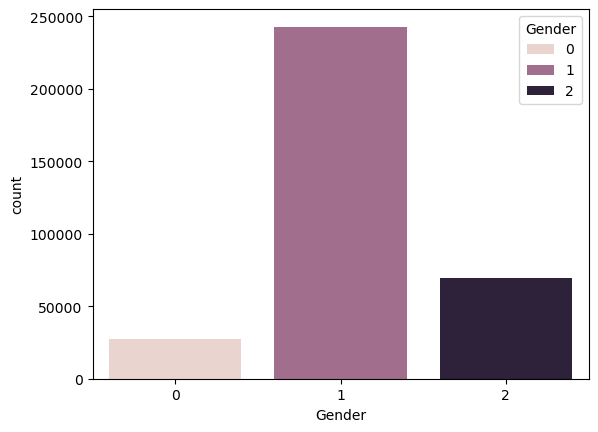

In [18]:
# Visualising the distribution of Gender in the data:
sns.countplot(x = 'Gender', data = df, hue = 'Gender')

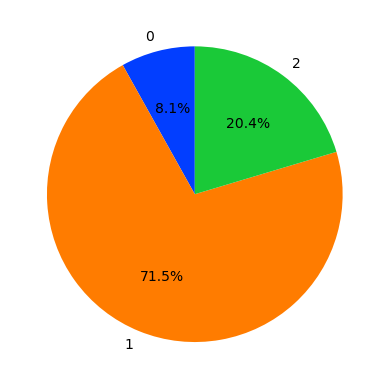

In [19]:
# Visualising gender using a pie-chart:
plt.pie(df.groupby('Gender')['Start Time'].count(), labels = df.groupby('Gender')['Start Time'].count().index,autopct='%1.1f%%', startangle=90)
plt.show()

##### Therefore far more rides are undertaken by males than any other gender
##### Insight: The company can focus primarily on male riders during their marketing campaigns. They can also generate revenue by selling ad spots to male facing brands 

##### 3. Start and End Stations:

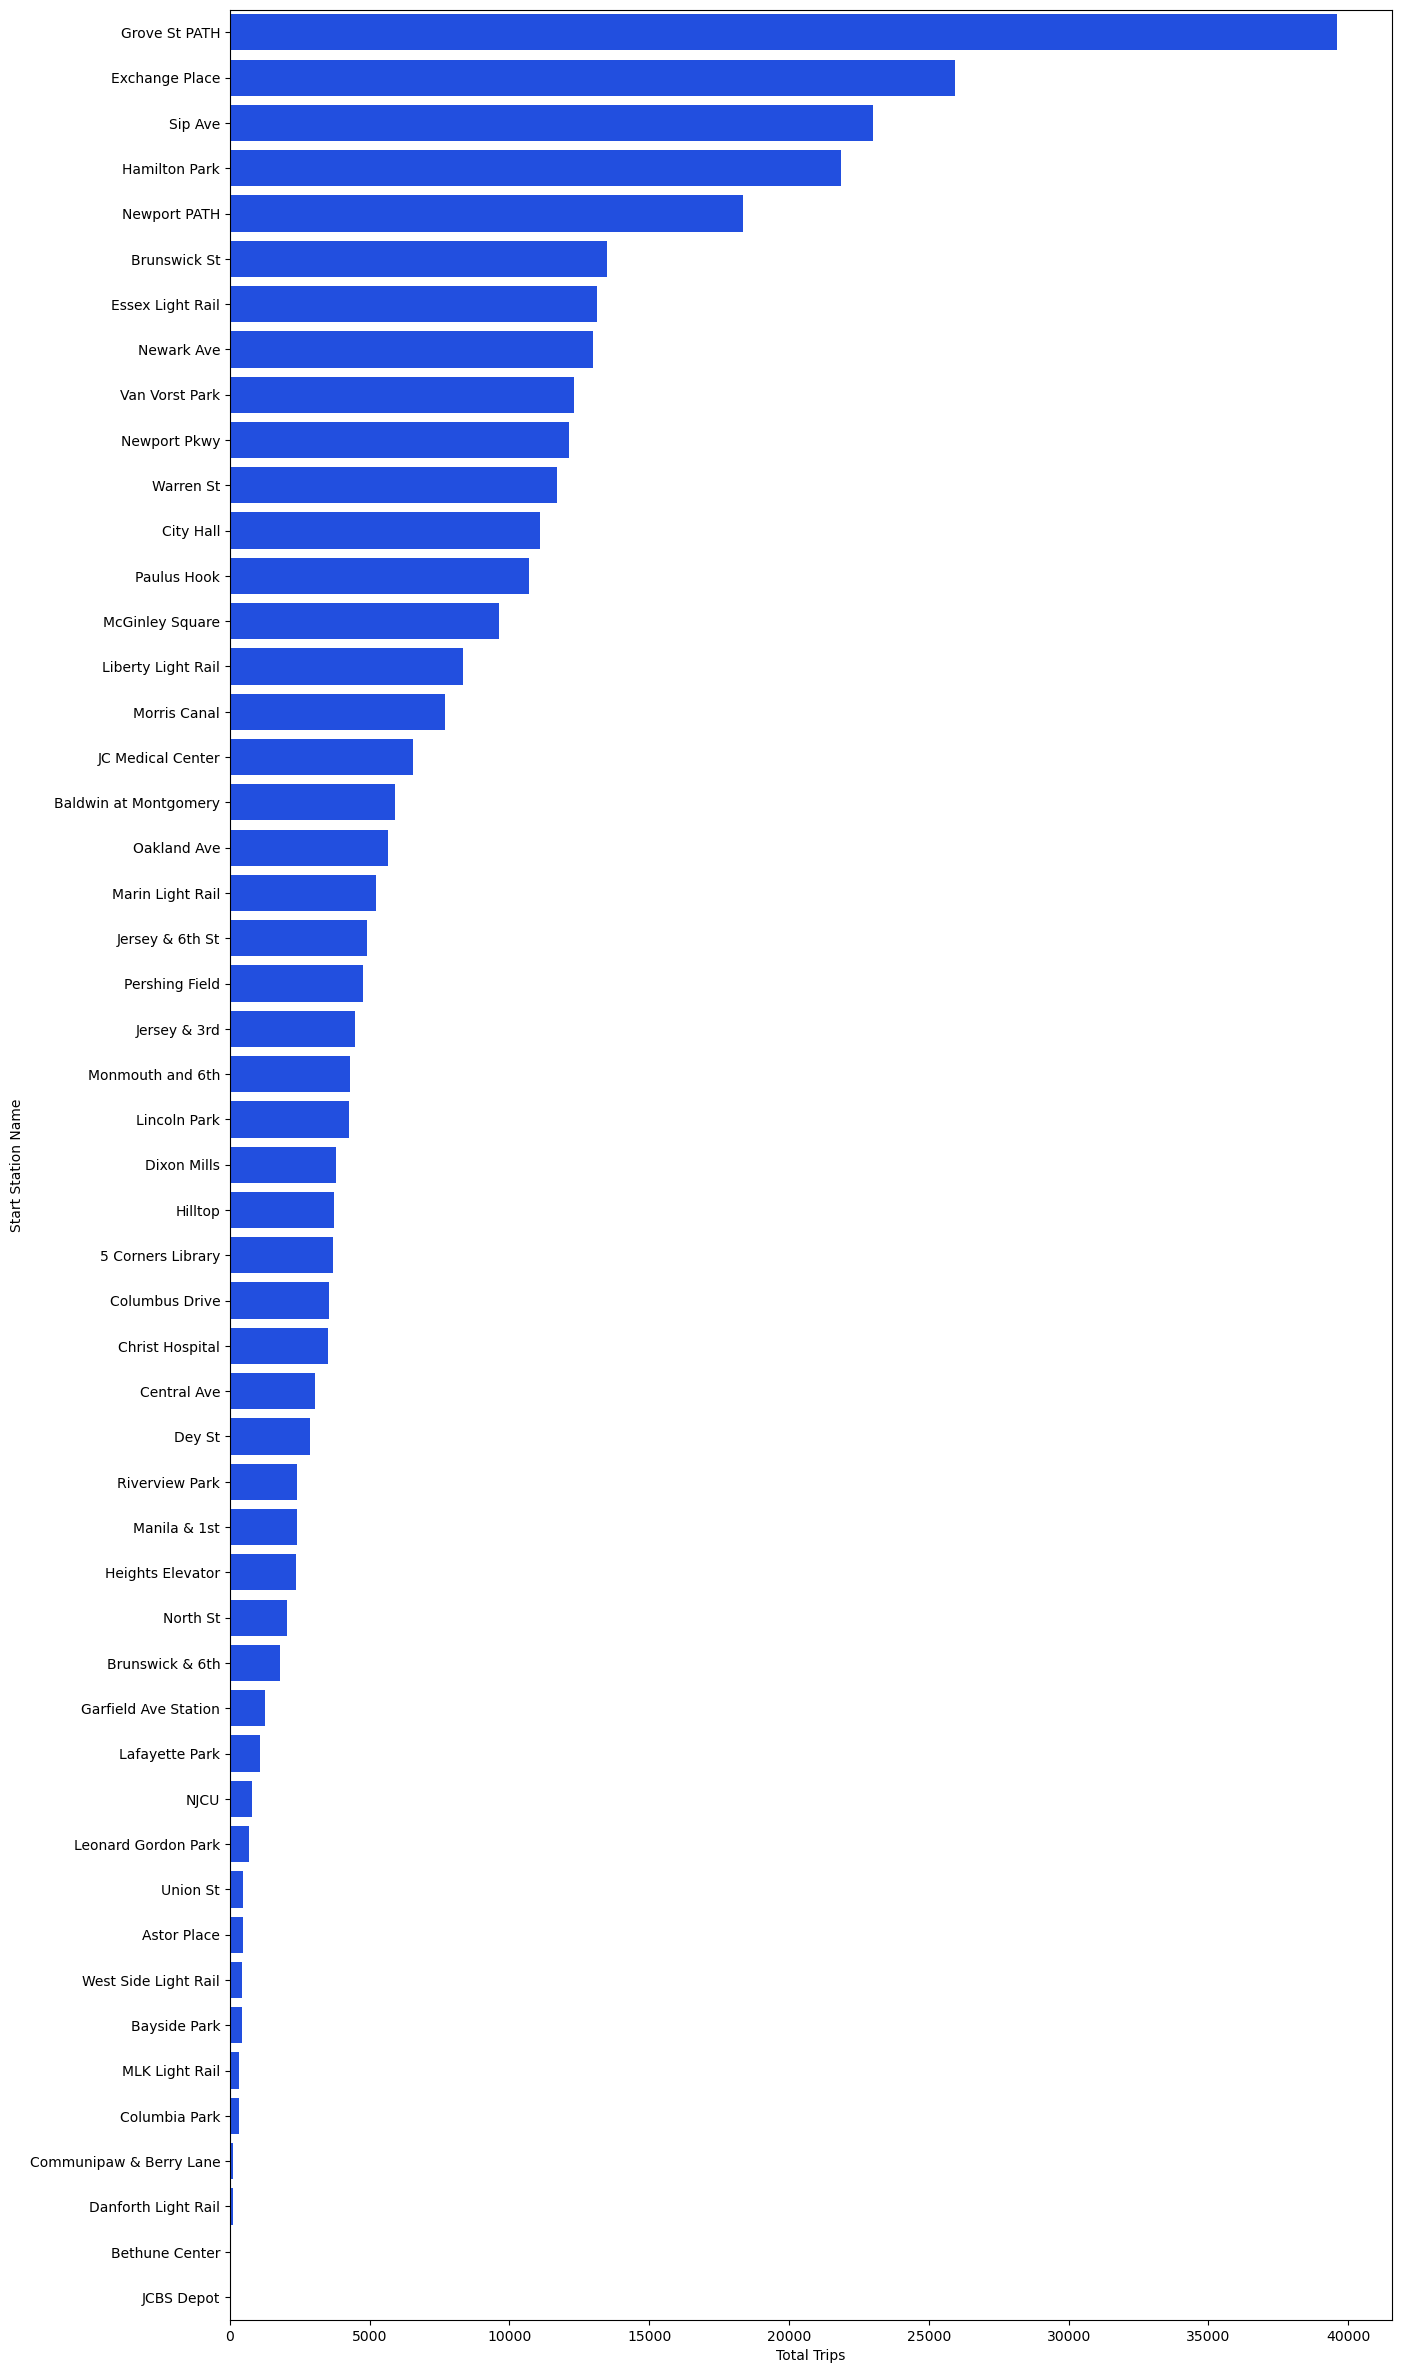

In [20]:
# We can look at the top start and end stations as well:

dfs = df.groupby('Start Station Name').agg(Total_trips=('Start Station ID', 'count')).reset_index().sort_values('Total_trips', ascending = False)
plt.figure(figsize = (15, 30))
sns.barplot(data = dfs, y = 'Start Station Name', x = 'Total_trips')
plt.xlabel('Total Trips')
plt.show()

##### Insight: Stations like 'Grove St Path', 'Exchange Place' have the highest number of rides. This info can be utilised to select high visibility spots for advertisement/marketing

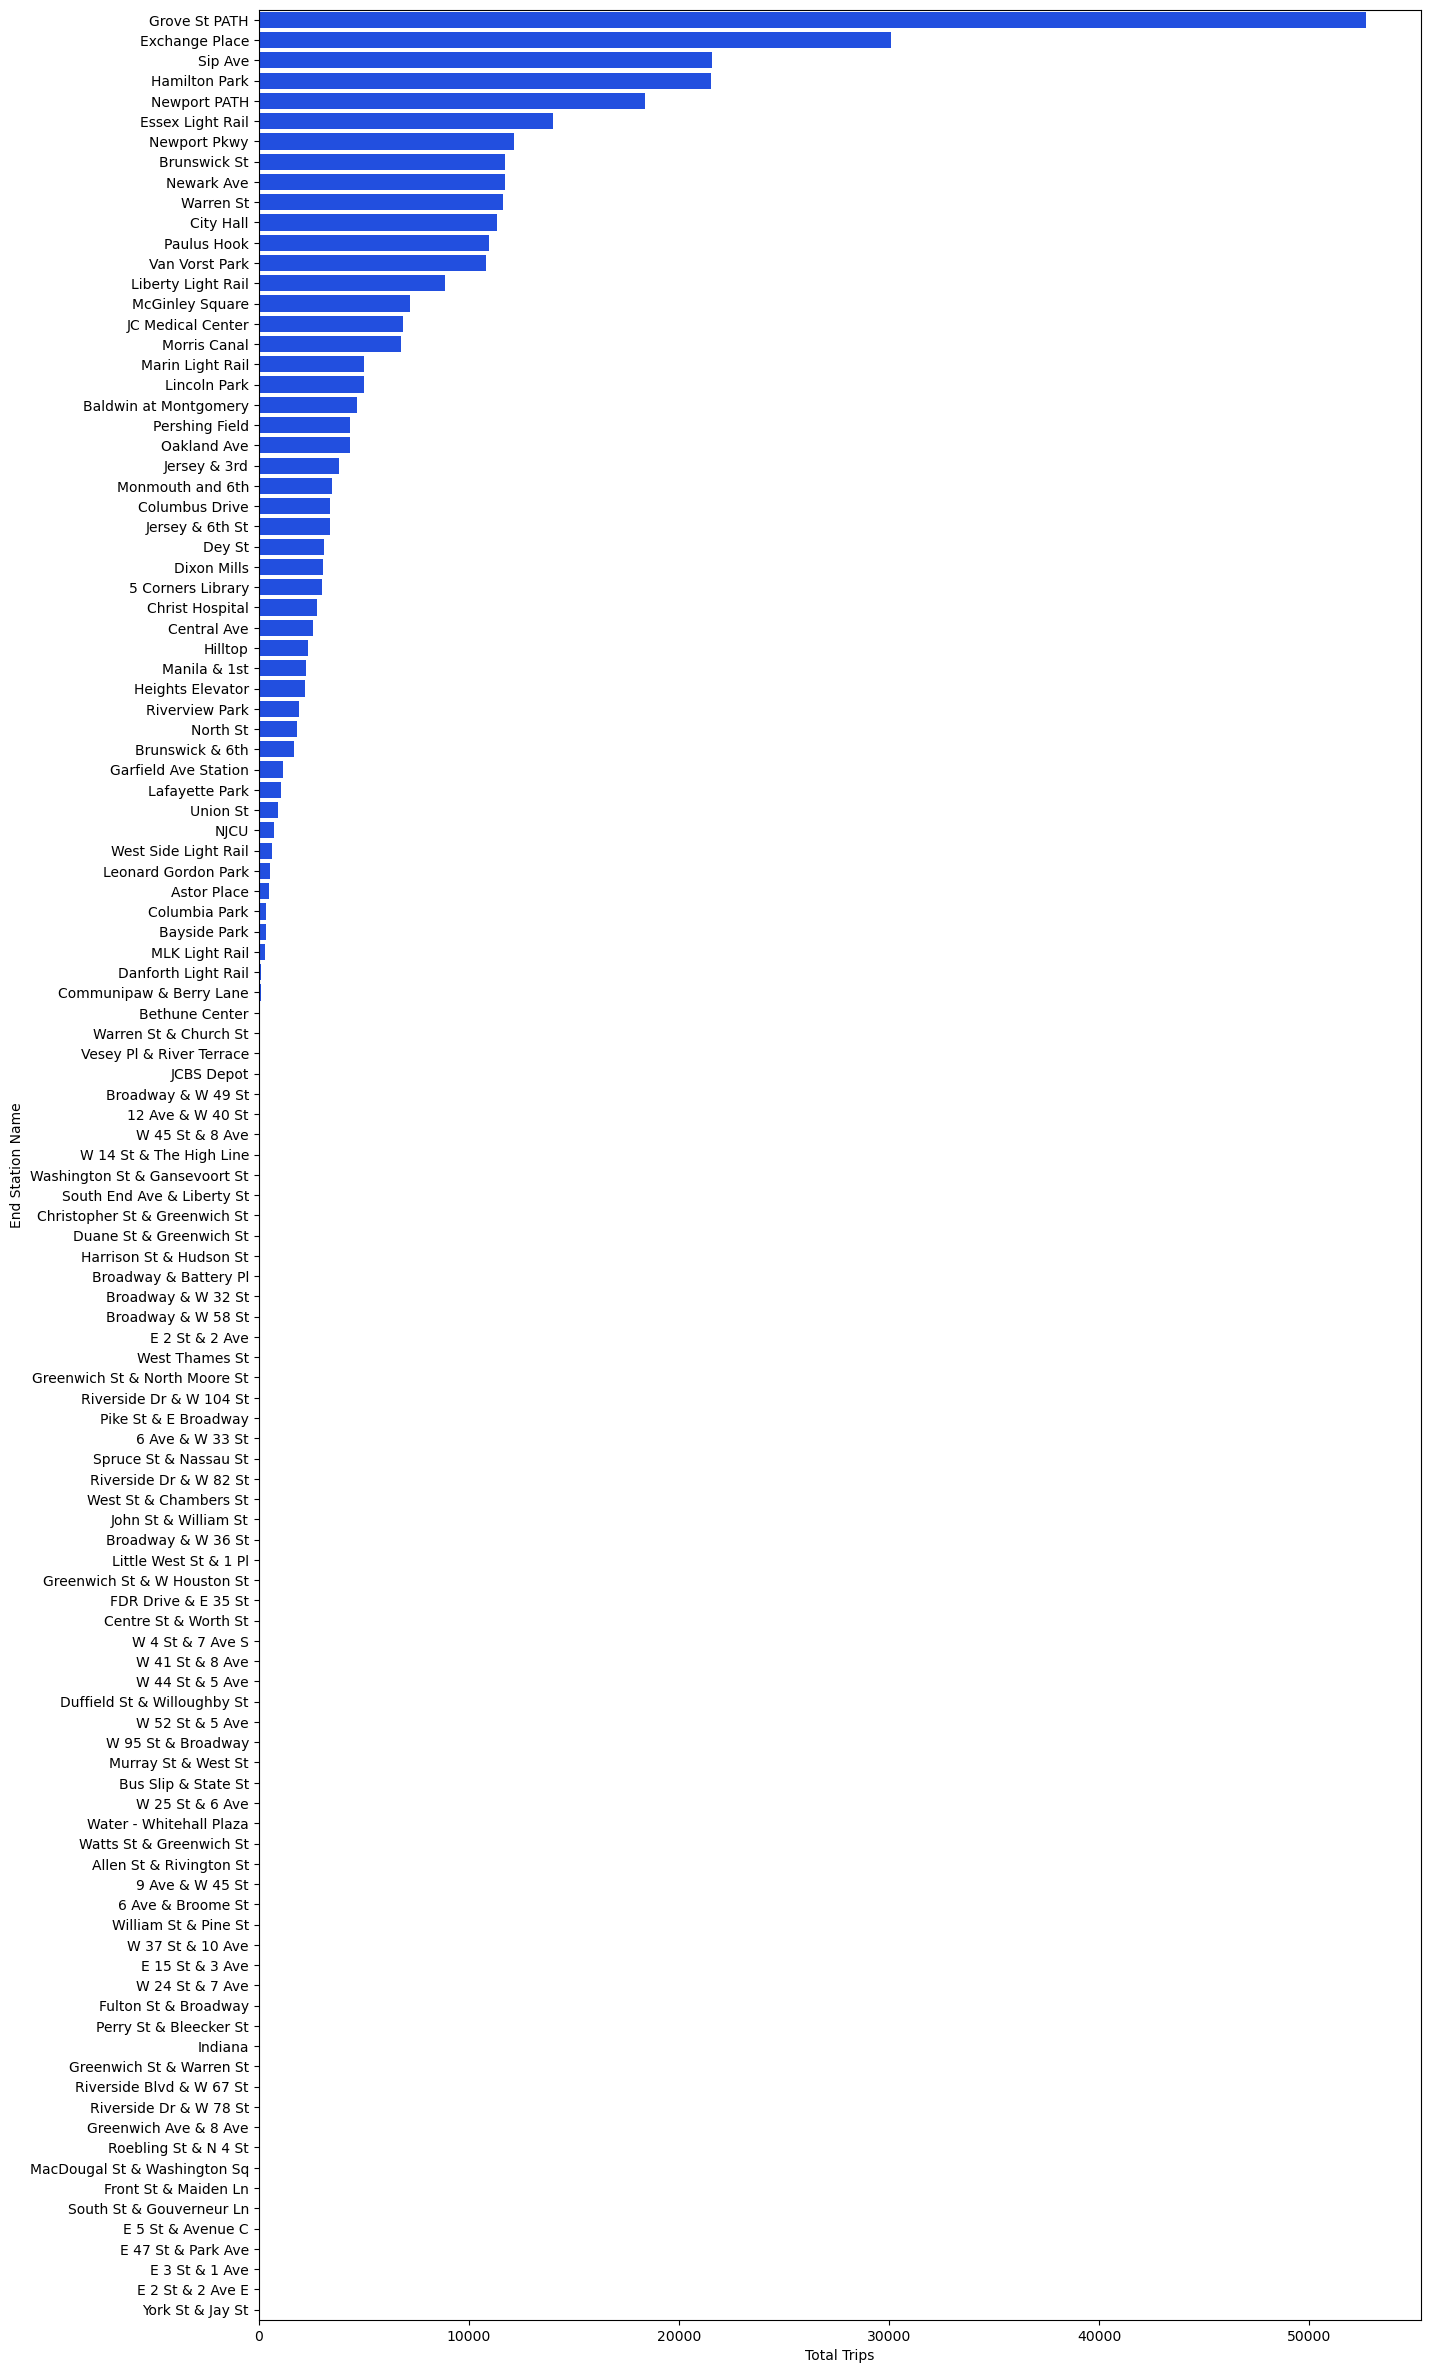

In [21]:
dfe = df.groupby('End Station Name').agg(Total_trips=('End Station ID', 'count')).reset_index().sort_values('Total_trips', ascending = False)

plt.figure(figsize = (15, 30))
sns.barplot(data = dfe, y = 'End Station Name', x = 'Total_trips')
plt.xlabel('Total Trips')
plt.show()

##### Grove St PATH, Exchange Place, Sip Ave, Hamilton Park, Newport PATH, Essex Light Rail, Newport Pkwy, Newark Ave and Brunswick St are by far among the most popular stations (as start and end points)

##### 4. User Type:

In [22]:
#Exploring the distribution of subscribers vs customers:
df.groupby('User Type')['Start Time'].count()

User Type
Customer       21879
Subscriber    317741
Name: Start Time, dtype: int64

([<matplotlib.patches.Wedge at 0x17b38bf9bb0>,
 [Text(-0.22110974775858988, 1.077548365246838, 'Customer'),
  Text(0.22110972253674996, -1.0775483704222848, 'Subscriber')],
 [Text(-0.12060531695923082, 0.5877536537710025, '6.4%'),
  Text(0.1206053032018636, -0.5877536565939735, '93.6%')])

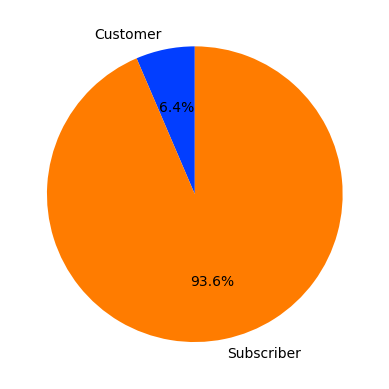

In [23]:
# using pie chart to visualize User type distribution
plt.pie(df.groupby('User Type')['Start Time'].count(), labels = df.groupby('User Type')['Start Time'].count().index,autopct='%1.1f%%', startangle=90)

#### Majority of the rides are taken by subscribers

##### Time of Day analysis:

In [24]:
# We extract the hour of day from the Start Time column to analyse the distribution of trip start times:

df['hour_of_day_start'] = pd.DatetimeIndex(df['Start Time']).hour
df['hour_of_day_stop'] = pd.DatetimeIndex(df['Stop Time']).hour

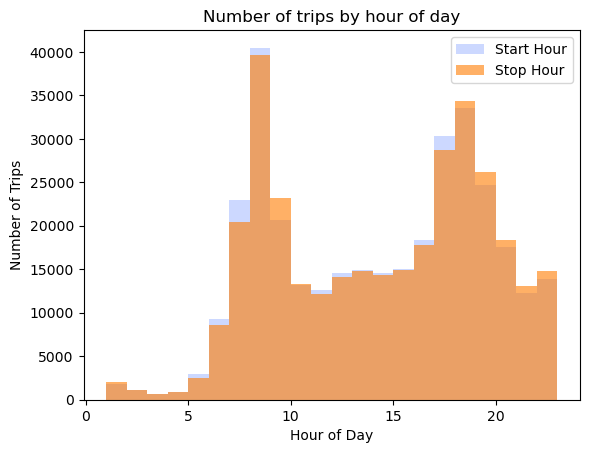

In [25]:
# Plotting distribution of start and end times on the same graph to observe trends if any

plt.hist(df.hour_of_day_start, bins = np.arange(1, 24, 1), alpha = 0.2, label = 'Start Hour')
plt.hist(df.hour_of_day_stop, bins = np.arange(1, 24, 1), alpha = 0.6, label = 'Stop Hour')
plt.title('Number of trips by hour of day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()

##### We find that most trips are undertaken during peak morning and evening hours. There is a high overlap between hour of start and stop time, which is due to a short trip duration (usually a few minutes)

In [26]:
# Visualizing the distribution of age

In [27]:
# We can visualise this better using a distribution:
# Creating age groups for our Users:

age_groups = ["<18", "19-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "70+"]
age_group_limits = [0, 18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, np.inf]

In [28]:
# assigning age group to our Dataframe based on the groups created
df['Age_Group'] = pd.cut(df['Age'], age_group_limits, labels = age_groups)

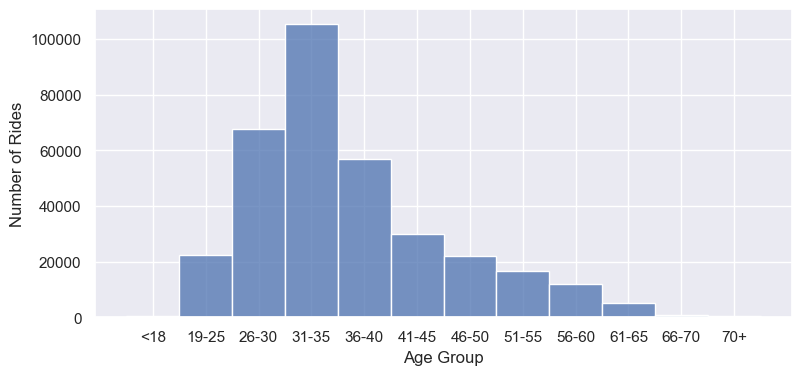

In [29]:
#Visualising the age distribution:

sns.set(rc={"figure.figsize":(9, 4)}) # To widen the graph
sns.histplot(data = df, x = 'Age_Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Rides')
plt.show()

##### Significant majority of trips have been undertaken by Users in the age bracket of 26-40. These are early to mid-career professionals who are likely to opt for bike rides to commute to work

##### Possible explanation to this could be: 
##### 1. As the ability to afford better commute options increases with age, the ridership gradually declines
##### 2. Younger people are more likely to use a bike to commute as compared to older ones

In [30]:
# Counts of the Age Distribution:

df.groupby('Age_Group')['Start Time'].count()

C:\Users\Prashast\AppData\Local\Temp\ipykernel_9332\3492500844.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Start Time'].count()


Age_Group
<18         407
19-25     22241
26-30     67573
31-35    105488
36-40     56943
41-45     29910
46-50     22019
51-55     16459
56-60     11997
61-65      5252
66-70       891
70+         440
Name: Start Time, dtype: int64

### Bivariate Analysis

##### We can analyse median trip duration by Gender:

<Axes: xlabel='Gender', ylabel='Trip_Duration_in_min'>

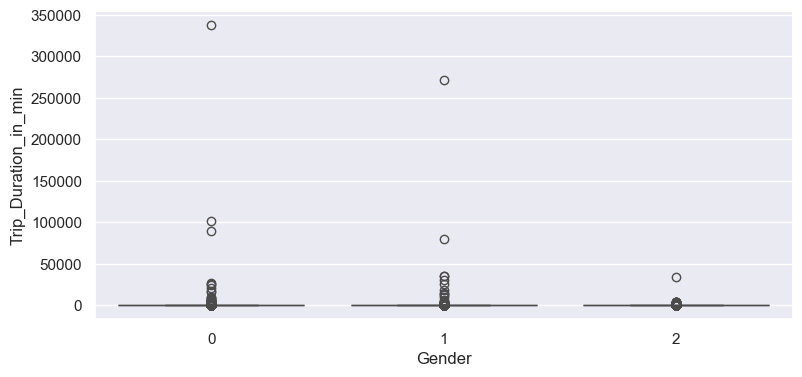

In [31]:
# Analyzing trip duration for each gender using a boxplot
sns.boxplot(data = df, x = 'Gender', y = 'Trip_Duration_in_min')

In [32]:
# The boxplot is heavily influenced by the presence of outliers in our data since the trip duration is quite right-skewed.
# Calculating the median of the trip durations for each gender:

df.groupby('Gender')['Trip_Duration_in_min'].median()

Gender
0    15.0
1     6.0
2     7.0
Name: Trip_Duration_in_min, dtype: float64

##### Median. trip duration is not significantly different between males and females (~6 minutes), but seems to be longer for those with unspecified genders. We can test this later using hypothesis testing

In [33]:
##### Analysing the age distribution of our Subscribers vs non-subscribers:

df.groupby('User Type')['Age'].median()

User Type
Customer      32.0
Subscriber    35.0
Name: Age, dtype: float64

##### Subscribers are on average slightly older than other Users, but not significantly so

<Axes: xlabel='Age_Group', ylabel='count'>

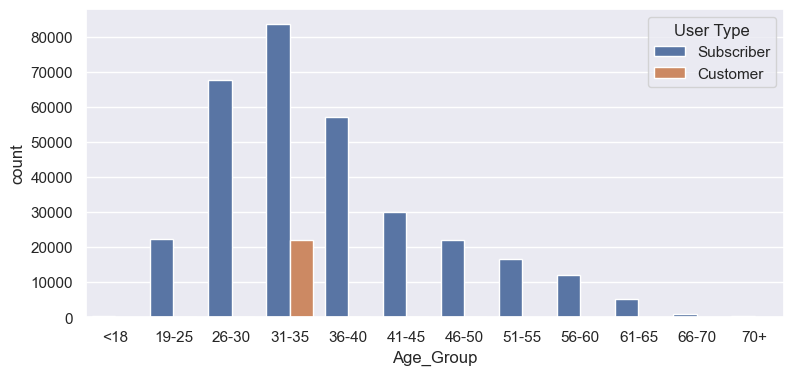

In [34]:
# Visualising the number of each User Type in each age group:

sns.countplot(data = df, x = 'Age_Group', hue = 'User Type')

##### Looks like a lot of the Customers (non-subscribers) fall in the 31-35 age group. Let's take a closer look with counts:

In [35]:
df.groupby(['Age_Group','User Type']).size()

C:\Users\Prashast\AppData\Local\Temp\ipykernel_9332\649390213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group','User Type']).size()


Age_Group  User Type 
<18        Customer          0
           Subscriber      407
19-25      Customer         12
           Subscriber    22229
26-30      Customer         13
           Subscriber    67560
31-35      Customer      21840
           Subscriber    83648
36-40      Customer          7
           Subscriber    56936
41-45      Customer          3
           Subscriber    29907
46-50      Customer          4
           Subscriber    22015
51-55      Customer          0
           Subscriber    16459
56-60      Customer          0
           Subscriber    11997
61-65      Customer          0
           Subscriber     5252
66-70      Customer          0
           Subscriber      891
70+        Customer          0
           Subscriber      440
dtype: int64

##### 1. The total number of Subscribers and Customers increases sharply from the ages of 19-25 to 26-30 and peaks in the 31-35 age group. This could be since they make up a large portion of the working population that uses these bikes
##### 2. The number of both types of users then gradually reduces as age increases

##### 3. This is a useful piece of information for marketing campaigns as age group between 31-35 contains the significant majority of non-paying users overall and also contains a high number of non-paying users in absolute terms.

<Axes: xlabel='Age_Group', ylabel='count'>

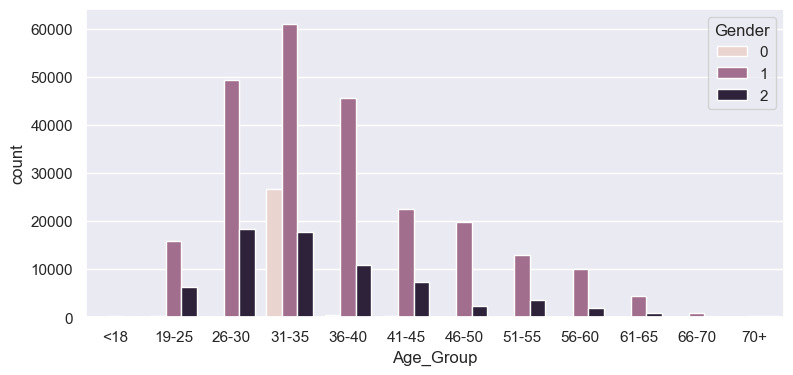

In [36]:
# Visualising age and gender using a countplot:

sns.countplot(data = df, x = 'Age_Group', hue = 'Gender')

In [37]:
# Counting User Type by Gender to see if any patterns emerge:

df.groupby(['Age_Group','User Type']).size()

C:\Users\Prashast\AppData\Local\Temp\ipykernel_9332\1475867556.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group','User Type']).size()


Age_Group  User Type 
<18        Customer          0
           Subscriber      407
19-25      Customer         12
           Subscriber    22229
26-30      Customer         13
           Subscriber    67560
31-35      Customer      21840
           Subscriber    83648
36-40      Customer          7
           Subscriber    56936
41-45      Customer          3
           Subscriber    29907
46-50      Customer          4
           Subscriber    22015
51-55      Customer          0
           Subscriber    16459
56-60      Customer          0
           Subscriber    11997
61-65      Customer          0
           Subscriber     5252
66-70      Customer          0
           Subscriber      891
70+        Customer          0
           Subscriber      440
dtype: int64

##### 1. Those with Gender Unspecified seem to be concentrated in the age group of 31-35, which is somewhat surprising to note.
##### 2. However, we have already seen that approx. 8% of rides have been taken by Users with unspecified genders
##### 3. We put this down to a lack of specific data on the gender of the users, and retain the Gender = 0 data to hold on to potentially important data points in other columns

##### We can also analyse the day of week and hour of day to understand the most popular ride times:

In [38]:
# Deriving day of week from the Start Time column:

df['day_of_week'] = pd.DatetimeIndex(df['Start Time']).day_name()

In [39]:
# Creating our own custom order day of week is a categorical variable:

custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# We then create separate dataframes for Subscribers vs Customers for day of week and hour of day:

df_subscriber = df[df['User Type'] == 'Subscriber'][['day_of_week', 'hour_of_day_start', 'User Type']].groupby(['day_of_week', 'hour_of_day_start']).count().reset_index().rename(columns={'User Type': 'Total Rides'})
df_subscriber['day_of_week'] = pd.Categorical(df_subscriber['day_of_week'], categories=custom_order, ordered=True)

df_customer = df[df['User Type'] == 'Customer'][['day_of_week', 'hour_of_day_start', 'User Type']].groupby(['day_of_week', 'hour_of_day_start']).count().reset_index().rename(columns={'User Type': 'Total Rides'})
df_customer['day_of_week'] = pd.Categorical(df_customer['day_of_week'], categories=custom_order, ordered=True)

df_subscriber_2 = df_subscriber.pivot(index = "day_of_week", columns = "hour_of_day_start", values = "Total Rides")

df_customer_2 = df_customer.pivot(index = "day_of_week", columns = "hour_of_day_start", values = "Total Rides")

<Axes: title={'center': 'Total Rides by Subscribers (Day of Week vs Hour of Day)'}, xlabel='hour_of_day_start', ylabel='day_of_week'>

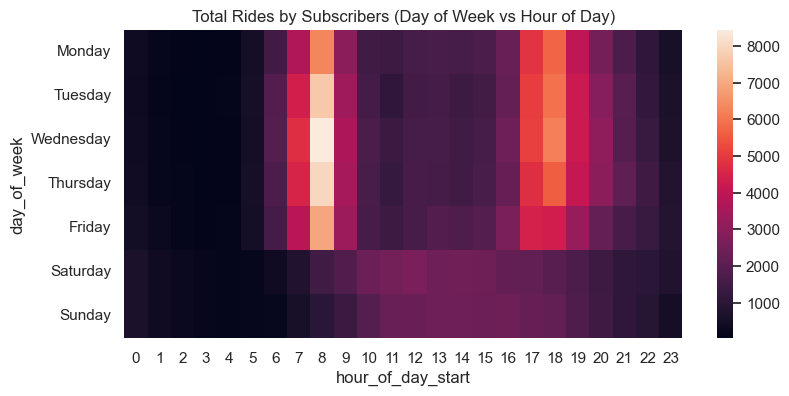

In [40]:
# Visualising the most popular start times for subsribers using a heatmap:

plt.title("Total Rides by Subscribers (Day of Week vs Hour of Day)")
sns.heatmap(df_subscriber_2)

##### It's quite clear that Subscribers tend to ride most often during the peak office hours on weekdays

<Axes: title={'center': 'Total Rides by Customer (Day of Week vs Hour of Day)'}, xlabel='hour_of_day_start', ylabel='day_of_week'>

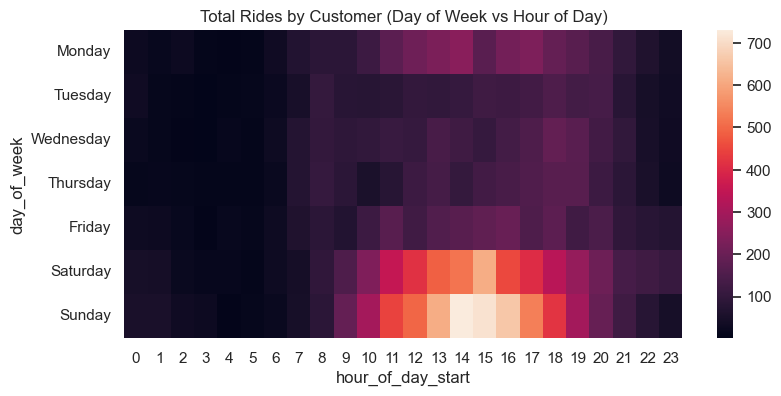

In [41]:
# Visualising the most popular start times for other customers:

plt.title("Total Rides by Customer (Day of Week vs Hour of Day)")
sns.heatmap(df_customer_2)

##### 1. The story is the polar opposite for our Customers or non-paying users, as they seem to be riding mostly on weekends in the afternoon and early evening
##### 2. This is an important finding, since we have already seen that vast majority of non-paying users are in the age group of 31-35. We now also see that they use the bikes on weekends, presumably for casual or leisure activities and not to commute to work
##### 3. Marketers could utilise dynamic hoardings at bike stops which display (a) Ads targeted at the early 30s age group during weekdays, and (b) Ads touting the benefits of being a subscriber in addition to other ads on weekends

<Axes: xlabel='date', ylabel='Start Station ID'>

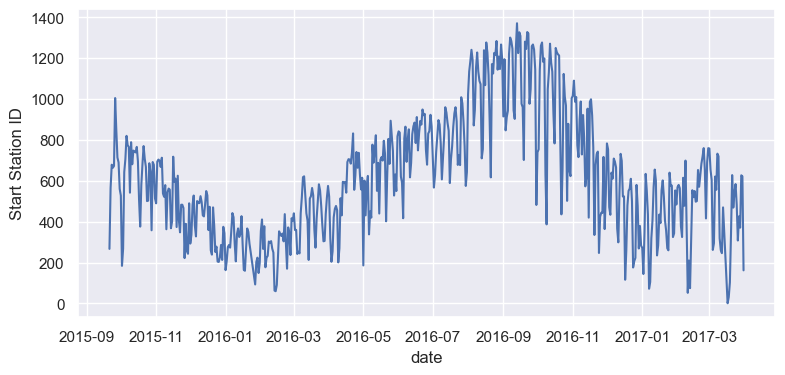

In [42]:
# We can extract data on the date to perform time series analysis and spot trends:

df['date'] = pd.DatetimeIndex(df['Start Time']).date

# creating new df with date and counts of rides

dfd = df.groupby('date')['Start Station ID'].count().reset_index()

# generating a line plot for time series analysis of the trend of rides
sns.lineplot(data = dfd, x = 'date', y = 'Start Station ID')

##### We notice a marked seasonality in the number of rides. The number of rides declines as the end of the calendar year approaches and then rises again as summer approaches
##### We put this down to the weather. Summertime is much more suitable for biking than cold New York winters.

##### Next, visualising where our start and end stops are using geospatial fields (latitude, longitude) will allow us to spot the spread of stations across the city, which could be important information for marketers

In [43]:
# Folium is a package that will help us place the start and end stops on a map
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [44]:
df_sub = df[['Start Station Name','End Station Name', 'Start Station Latitude','Start Station Longitude','End Station Latitude','End Station Longitude']]

df_sub['both'] = df_sub['Start Station Name'] + ', ' + df_sub['End Station Name']

df_sub = df_sub.groupby(['Start Station Name','Start Station Latitude', 'Start Station Longitude', 'End Station Name', 'End Station Latitude','End Station Longitude'])['both'].count().reset_index(name='Counts of trips')

C:\Users\Prashast\AppData\Local\Temp\ipykernel_9332\3770541228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['both'] = df_sub['Start Station Name'] + ', ' + df_sub['End Station Name']


In [45]:
import folium

# Create the base map
map1 = folium.Map(
    location=[40.732775, -74.105973],
    tiles='cartodbpositron',
    zoom_start=15,
    max_width=150,
    max_height=150
)

# List to hold all latitude and longitude pairs (both start and end station coordinates)
locations = []

# Add markers for End Stations
df_sub.apply(lambda row: [
    folium.CircleMarker(
        location=[row["End Station Latitude"], row["End Station Longitude"]],
        popup=row["End Station Name"],
        radius=5, 
        color="Red"
    ).add_to(map1),
    locations.append([row["End Station Latitude"], row["End Station Longitude"]])
], axis=1)

# Add markers for Start Stations
df_sub.apply(lambda row: [
    folium.CircleMarker(
        location=[row["Start Station Latitude"], row["Start Station Longitude"]],
        popup=row["Start Station Name"]
    ).add_to(map1),
    locations.append([row["Start Station Latitude"], row["Start Station Longitude"]])
], axis=1)

# Adjust map view to fit all the locations (both start and end points)
map1.fit_bounds(locations)

# render the map
map1

##### While the spread of stops is quite extensive in Manhattan and Jersey City, we could consider adding many more stops in other boroughs like Brooklyn, the Bronx and Queens.
##### Since most offices are in Manhattan, it is important to build connectivity from other boroughs to Manhattan as well

## Hypothesis Testing

In [46]:
# Hypothesis 1:
# There is no difference between the average trip duration for male and female riders

# Two sample t-test (2 tailed)
# mu_1 : average trip duration for male riders
# mu_2 : average trip duration for female riders

# Null Hypothesis: mu_1 = mu_2
# Alternate Hypothesis: mu_1 != mu_2

# alpha = 5%

In [47]:
# creating numpy arrays for male and female
trip_duration_male = np.array(df[df['Gender'] == 1]['Trip_Duration_in_min'])
trip_duration_female = np.array(df[df['Gender'] == 2]['Trip_Duration_in_min'])

# Calculating sample size
n_male = len(trip_duration_male)
n_female = len(trip_duration_female)

# Calculating sample mean
trip_duration_male_mean = np.mean(trip_duration_male)
trip_duration_female_mean = np.mean(trip_duration_female)

# Calculating sample standard Deviation
sample_std_male = np.std(trip_duration_male, ddof=1)  # ddof is delta for degree of freedom
sample_std_female = np.std(trip_duration_female, ddof=1)  # ddof is delta for degree of freedom

# Calculating Sample variance
var_male = np.var(trip_duration_male, ddof=1)
var_female = np.var(trip_duration_female, ddof=1)

# Calculating t-statistic
t_stat = (trip_duration_male_mean - trip_duration_female_mean) / np.sqrt((var_male/n_male) + (var_female/n_female))

# Calculating degree of freedom
dof = ((var_male/n_male) + (var_female/n_female))**2 / ((var_male**2 / ((n_male**2)*(n_male-1))) + (var_female**2 / ((n_female**2)*(n_female-1))))

# Compute the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), dof))

print(f"Details of Male")
print(f"Sample Size: {n_male}")
print(f"Sample Mean: {trip_duration_male_mean}")
print(f"Sample Standard Deviation: {sample_std_male}")
print(f"Sample Variance: {var_male}")

print("\n")

print(f"Details of female")
print(f"Sample Size: {n_female}")
print(f"Sample Mean: {trip_duration_female_mean}")
print(f"Sample Standard Deviation: {sample_std_female}")
print(f"Sample Variance: {var_female}\n\n")

print(f"t-statistic: {t_stat}")
print(f"degree of freedom: {dof}")
print(f"p-value: {p_value}")
print("-----------------------------------------------------------------------------------------")


Details of Male
Sample Size: 242904
Sample Mean: 11.812567928070349
Sample Standard Deviation: 594.8185159336042
Sample Variance: 353809.0668974553


Details of female
Sample Size: 69197
Sample Mean: 11.741318265242713
Sample Standard Deviation: 142.21157831781557
Sample Variance: 20224.13300764419


t-statistic: 0.05387740714528138
degree of freedom: 306800.31755342777
p-value: 0.9570328720820169
-----------------------------------------------------------------------------------------


##### Since p-value is > alpha (0.05), therefore we fail to reject the Null Hypothesis. There is not enough evidence that average trip duration between males and females is different

In [48]:
# Hypothesis 2:
# There is no difference between the average trip duration for subscribers and customers(non-subscribers)

# Two sample t-test (2 tailed)
# mu_1 : average trip duration for subscribers riders
# mu_2 : average trip duration for customers riders

# Null Hypothesis: mu_1 = mu_2
# Alternate Hypothesis: mu_1 != mu_2

# alpha = 5%

In [49]:
# creating numpy arrays for Subscribers and Customers
trip_duration_subscriber = np.array(df[df['User Type'] == 'Subscriber']['Trip_Duration_in_min'])
trip_duration_customer = np.array(df[df['User Type'] == 'Customer']['Trip_Duration_in_min'])

# Calculating sample size
n_subscriber = len(trip_duration_subscriber)
n_customer = len(trip_duration_customer)

# Calculating sample mean
trip_duration_subscriber_mean = np.mean(trip_duration_subscriber)
trip_duration_customer_mean = np.mean(trip_duration_customer)

# Calculating sample standard Deviation
sample_std_subscriber = np.std(trip_duration_subscriber, ddof=1)  # ddof is delta for degree of freedom
sample_std_customer = np.std(trip_duration_customer, ddof=1)  # ddof is delta for degree of freedom

# Calculating Sample variance
var_subscriber = np.var(trip_duration_subscriber, ddof=1)
var_customer = np.var(trip_duration_customer, ddof=1)

# Calculating t-statistic
t_stat = (trip_duration_subscriber_mean - trip_duration_customer_mean) / np.sqrt((var_subscriber/n_subscriber) + (var_customer/n_customer))

# Calculating degree of freedom
dof = ((var_subscriber/n_subscriber) + (var_customer/n_customer))**2 / ((var_subscriber**2 / ((n_subscriber**2)*(n_subscriber-1))) + (var_customer**2 / ((n_customer**2)*(n_customer-1))))

# Compute the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), dof))

print(f"Details of Subscriber")
print(f"Sample Size: {n_subscriber}")
print(f"Sample Mean: {trip_duration_subscriber_mean}")
print(f"Sample Standard Deviation: {sample_std_subscriber}")
print(f"Sample Variance: {var_subscriber}")

print("\n")

print(f"Details of Customer")
print(f"Sample Size: {n_customer}")
print(f"Sample Mean: {trip_duration_customer_mean}")
print(f"Sample Standard Deviation: {sample_std_customer}")
print(f"Sample Variance: {var_customer}\n\n")

print(f"t-statistic: {t_stat}")
print(f"degree of freedom: {dof}")
print(f"p-value: {p_value}")
print("-----------------------------------------------------------------------------------------")

Details of Subscriber
Sample Size: 317741
Sample Mean: 11.804277697873426
Sample Standard Deviation: 524.5419528368052
Sample Variance: 275144.26028584916


Details of Customer
Sample Size: 21879
Sample Mean: 77.6797385620915
Sample Standard Deviation: 2494.1385528847104
Sample Variance: 6220727.120985837


t-statistic: -3.9008251647565895
degree of freedom: 22011.45234964838
p-value: 9.615019794684265e-05
-----------------------------------------------------------------------------------------


##### 1. Since p-value is < alpha (0.05), therefore we reject the Null Hypothesis. There is enough evidence that average trip duration is higher for Customers than for Subscribers
##### 2. This is consistent with our findings for most popular trip times for Subscribers vs. Customers. Subscribers use bikes to commute (shorter trips) while Customers tend to use them on weekends (longer, more leisurely rides)